# Temas: Clustering
<br/><br/>

<center>
    
## Taller de Ciencia de Datos
### Omar Piña Ramírez
### Instituto Nacional de Perinatología
### Departamento de Bioinformática y Análisis Estadísticos
### Investigador en Ciencias Médicas
### delozath@gmail.com
</center>

In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1500px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
.CodeMirror{
    font-size: 15px;
}

.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 120%;
}
</style>

In [2]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from   matplotlib import pyplot as plt

import ipywidgets as widgets
from   ipywidgets import interact, interact_manual, FloatSlider, Layout

import chart_studio.plotly as py
import plotly.graph_objs   as go
import plotly.express      as px
from   plotly.offline      import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode (connected=True)

## Ejemplo aprendizaje no supervisado

### Datos sintéticos de archivo

In [3]:
PATH = './data/'
file = 'blobs.csv'

df_blobs = pd.read_csv(PATH + file)
df_blobs = df_blobs.loc[:500]

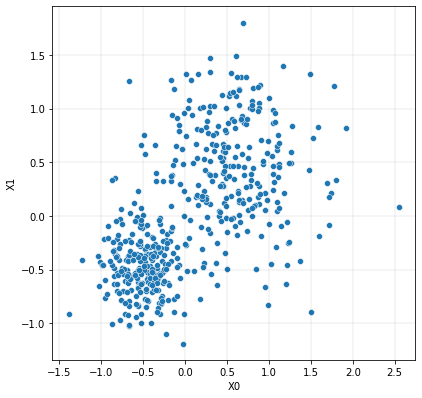

In [4]:
fig, ax  = plt.subplots(1,1,figsize=(6.5,6.5))
sns.scatterplot(x='X0', y='X1', data=df_blobs, ax=ax)
ax.grid(b=True, which='major', color='black', linewidth=0.075)
plt.show()

### 1. Scrubbing

In [5]:
X = df_blobs[['X0','X1']]
y = df_blobs['Label'].astype('int')
X

,X0,X1
0,-0.779101,-0.026934
1,0.225774,-0.442918
2,0.591406,0.545084
3,-0.231723,-0.226969
4,0.646126,1.186848
...,...,...
496,1.043711,0.988237
497,-0.554519,-0.506661
498,-0.861395,-0.324739
499,0.154553,0.098646


In [6]:
from sklearn.cluster import KMeans

k      = 2
kmeans = KMeans(n_clusters=k)

kmeans.fit(X)

KMeans(n_clusters=2)

In [7]:
centers = kmeans.cluster_centers_

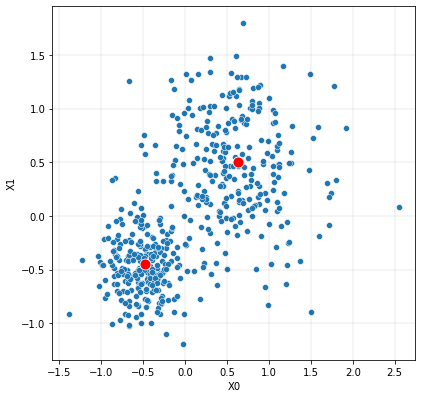

In [8]:
fig, ax  = plt.subplots(1,1,figsize=(6.5,6.5))
sns.scatterplot(x='X0', y='X1', data=df_blobs, ax=ax)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='red', s=120, ax=ax)
ax.grid(b=True, which='major', color='black', linewidth=0.075)
plt.show()

In [9]:
group = kmeans.labels_
group

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [10]:
from sklearn.metrics import recall_score     as sensitivity
from sklearn.metrics import confusion_matrix as cm
#group = -group+1

sen = sensitivity(y,group)
spe = sensitivity(y,group,pos_label=0)
print("Sensitivity: {:.3f}, Specificity {:.3f}".format(sen,spe))

cm(y,group).flatten('F').reshape(2,2)

Sensitivity: 0.900, Specificity 1.000


array([[231,  27],
       [  0, 243]])

### Datos Infarto

In [11]:
file = 'cardiovascular.csv'

data  = pd.read_csv(PATH + file)
data

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### Scrubbing

In [12]:
replace = {'famhist':{'Present':1,'Absent':0}}
data    = data.drop(columns='ind')
data    = data.replace(replace)
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [13]:
k      = 2
kmeans = KMeans(n_clusters=k)

kmeans.fit(data.drop(columns='chd'))

KMeans(n_clusters=2)

In [14]:
centers = kmeans.cluster_centers_
labels  = kmeans.labels_

In [15]:
#group = -group+1

sen = sensitivity(data['chd'],labels)
spe = sensitivity(data['chd'],labels,pos_label=0)
print("Sensitivity: {:.3f}, Specificity {:.3f}".format(sen,spe))

cm(data['chd'],labels).flatten('F').reshape(2,2)

Sensitivity: 0.188, Specificity 0.861


array([[260, 130],
       [ 42,  30]])

In [16]:
data.iloc[labels==0]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [17]:
k      = 2
kmeans = KMeans(n_clusters=k)

kmeans.fit(data)

centers = kmeans.cluster_centers_
labels  = kmeans.labels_

In [18]:
X = data.to_numpy()

In [19]:
D = []
for center in centers:
    d = (X - center)
    d = np.diag(d@d.T)
    D.append(d)

D = np.array(D)

In [20]:
@interact
def kmeas_outlayers(TOP=(4,22,2),center=np.unique(labels)):
    sort_index   = np.argsort(D[center])[::-1]
    highest_diff = D[center][sort_index][:TOP]

    print(highest_diff)
    return data.iloc[sort_index[:TOP]]

interactive(children=(IntSlider(value=12, description='TOP', max=22, min=4, step=2), Dropdown(description='cen…

In [21]:
from sklearn.cluster import DBSCAN

@interact
def dbscan_outlayer(eps=(1,20,1)):
    clustering = DBSCAN(eps=eps,algorithm='ball_tree').fit(X)
    return clustering.labels_

interactive(children=(IntSlider(value=10, description='eps', max=20, min=1), Output()), _dom_classes=('widget-…

In [22]:
@interact
def dbscan_outlayer(eps=(15,32,1)):
    clustering = DBSCAN(eps=eps,algorithm='ball_tree').fit(X)
    return data[clustering.labels_<0]

interactive(children=(IntSlider(value=23, description='eps', max=32, min=15), Output()), _dom_classes=('widget…